In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})
print('Downloaded content "{}"'.format(downloaded['title']))

file_list = folder.GetList()

csvfiles_id = file_list[0]['id']
for file in file_list[1:]:
    file.GetContentFile(file['title'])
    

In [ ]:
csv_folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(csvfiles_id)})

csv_list = csv_folder.GetList()
for file in csv_list:
    print(file.GetContentFile(file['title']))

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

# Pacotes utilizados

In [2]:
import pandas as pd
import interfacespfy as isp
import altair as alt
import seaborn as sns
import bokeh as bkh
import matplotlib.pyplot as plt

## Fazendo login no spotify e baixando musicas salvas

In [3]:
spfy = isp.login_user('belzedu')
musics = isp.get_favorite_songs(spfy)

In [4]:
pdmusics = pd.DataFrame(musics)
pdmusics.set_index(['id'], inplace=True)
print("Quantidade de musicas baixadas:", pdmusics.shape[0])
pdmusics.head()

Quantidade de musicas baixadas: 564


,album,album_id,artist,artist_id,duration_ms,name,popularity
id,,,,,,,
08JTB5hpXPCVPGJzic8E9e,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,Bee-Sting,42
7v9Ne4758aGFfFc5avh89h,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,Let's Dance To Joy Division,65
4w9TBRGhvbhiLQB8jVCusl,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,Cheetah Tongue,63
11IJA30efHAJLO3qroPh5L,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,Turn,64
7GvkOFkNsM6Exnkyqeajqm,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,Moving To New York,64


In [5]:
saved_songs_feat = isp.get_favorite_songs(spfy, features=True)
saved_songs_data = isp.get_favorite_songs(spfy)

## Descrição das colunas

- **acousticness**: Valor de 0 a 1 que indica se há som de audiência na música. Um valor de 1 indica maior certeza da presença de público na gravação e vice-versa.
- **danceability**: Valor de 0 a 1 que indica se a música é favorável para dançar de acordo com características musicais como setabilidade ritimica.
- Adicionar outras

In [6]:
df_ssongs = pd.DataFrame(saved_songs_feat)
print("Quantidade de musicas salvas:", df_ssongs.shape[0])
df_ssongs.set_index('id', inplace=True)
df_ssongs.head()

Quantidade de musicas salvas: 564


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,
08JTB5hpXPCVPGJzic8E9e,0.045700,0.650,0.866,0.000000,11,0.0682,-3.713,1,0.0343,115.001,0.717
7v9Ne4758aGFfFc5avh89h,0.001250,0.397,0.839,0.000000,4,0.5760,-6.674,1,0.1020,116.947,0.764
4w9TBRGhvbhiLQB8jVCusl,0.042600,0.533,0.967,0.000432,2,0.1320,-3.066,1,0.0570,95.008,0.603
11IJA30efHAJLO3qroPh5L,0.007430,0.531,0.847,0.000000,1,0.0916,-3.907,1,0.0529,105.030,0.380
7GvkOFkNsM6Exnkyqeajqm,0.000029,0.252,0.886,0.000005,9,0.2560,-4.678,0,0.0714,161.939,0.498


## Unindo os dados em um unico dataframe

In [7]:
df_ssongsdata = pd.DataFrame(saved_songs_data)
df_ssongsdata.set_index('id', inplace=True)
edu_songs = df_ssongsdata.join(df_ssongs)
print("Exemplo de amostra apos juntar tabelas:")
edu_songs['user'] = 'edujtm'
edu_songs.iloc[1].T

Exemplo de amostra apos juntar tabelas:


album               Proudly Present....A Guide To Love, Loss & Des...
album_id                                       75l5Bqvc0BH45UhJrS04Xj
artist                                                    The Wombats
artist_id                                      0Ya43ZKWHTKkAbkoJJkwIB
duration_ms                                                    191293
name                                      Let's Dance To Joy Division
popularity                                                         65
acousticness                                                  0.00125
danceability                                                    0.397
energy                                                          0.839
instrumentalness                                                    0
key                                                                 4
liveness                                                        0.576
loudness                                                       -6.674
mode                

## Lendo as playlists do Gabriel

In [8]:
#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt
gabriel_songs = pd.read_csv('gabriel_playlists.csv')
print("Quantidade de musicas:", gabriel_songs.shape[0])
gabriel_songs['user'] = 'gfeli'
gabriel_songs.iloc[1].T

Quantidade de musicas: 5936


Unnamed: 0                               2
acousticness                       0.00591
danceability                         0.398
energy                               0.939
id                  5hheGdf1cb4rK0FNiedCfK
instrumentalness                  0.000881
key                                      9
liveness                             0.357
loudness                            -2.865
mode                                     0
speechiness                         0.0648
tempo                               92.027
valence                              0.235
duration_ms                         342821
name                        The Devil In I
popularity                              70
user                                 gfeli
Name: 1, dtype: object

In [9]:
## Unindo os dataframes de ambos os usuários
all_songs = edu_songs.append(gabriel_songs[:564])
all_songs.shape[0]

1128

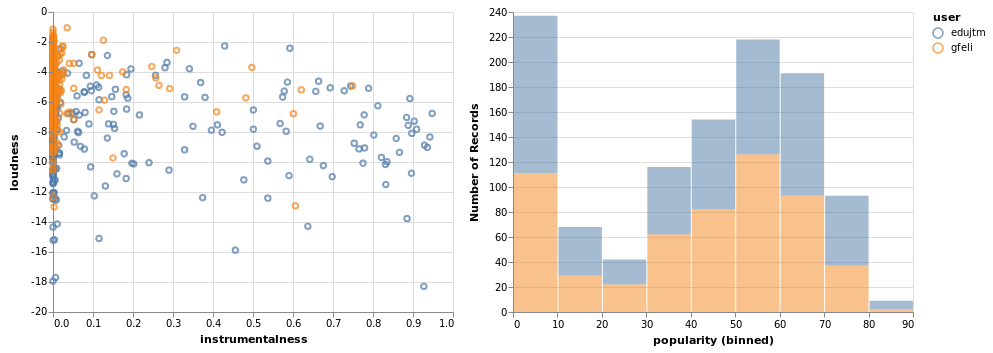

In [16]:
interval = alt.selection_interval()

data = alt.Chart(all_songs).mark_point().encode(
    x='instrumentalness',
    y='loudness',
    tooltip=['name', 'popularity'],
    color=alt.condition(interval, 'user:N', alt.value('lightgray')),
).properties(
    selection=interval
)

popularity = alt.Chart(all_songs).mark_bar(opacity=0.5).encode(
    x=alt.X('popularity', bin=True),
    y='count()',
    color='user'
).transform_filter(
    interval
)

data | popularity

In [ ]:
joined.describe()

In [7]:
joined[['acousticness', 'mode']]

,acousticness,mode
id,,
1MglqgabKH4iSkw8xHJ0J9,0.028500,0
3stCwD5L683yq5AfdxxXHC,0.060300,1
7gDwRzJhLs0fFHaGtMDJVM,0.247000,0
3clX2NMmjaAHmBjeTSa9vV,0.197000,1
4AH8GJVosfrbfhe5NVTAnx,0.033900,1
1P3eYnB5KiF4S2qZ7iQnOP,0.715000,0
0iJeENttrA8iKssJMIbXkK,0.131000,0
2Jim49nxjnjcTdyCJO4mr6,0.017600,1
49wGUI3kMeuHv0DhkgKlqt,0.021900,0


In [8]:
#%%timeit
#joined['acousticness'].corr(joined['liveness'])
joined.describe()

,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.176457,0.464567,0.433333,0.312427,6.500000,0.522900,-7.299033,0.140169,0.227893,0.729367,130.623100
std,0.197176,0.187299,0.504007,0.247285,3.919448,0.162979,2.513647,0.173908,0.344701,0.144571,33.317345
min,0.031300,0.101000,0.000000,0.094800,0.000000,0.193000,-12.464000,0.000092,0.000000,0.446000,51.539000
25%,0.047800,0.310500,0.000000,0.136500,4.000000,0.423000,-9.369500,0.023300,0.000000,0.629250,101.203750
50%,0.081450,0.478000,0.000000,0.174500,7.000000,0.486000,-7.254000,0.064750,0.000187,0.742500,134.969500
75%,0.238250,0.590750,1.000000,0.490000,11.000000,0.571000,-5.236500,0.227750,0.474750,0.866000,153.412250
max,0.786000,0.820000,1.000000,0.878000,11.000000,0.845000,-2.930000,0.715000,0.897000,0.936000,201.496000


In [9]:
musicmax = isp.get_user_playlists(spfy, 'maxmyllercarvalho', limit=30)
maxframe = pd.DataFrame(musicmax[0])
maxframe.set_index(['id'], inplace=True)
maxframe

,name
id,
6QewNVIDKdSl8Y3ycuHIei,Even Flow
08mG3Y1vljYA6bvDt4Wqkj,Back In Black
0c1gHntWjKD7QShC8s99sq,I Don't Want to Miss a Thing - From the Touchs...
5A1FmxbYVRZKy4nc16MAue,Sex on Fire
1sn6iOK93jnp0Hn5BnNOXy,Best of You
1L94M3KIu7QluZe63g64rv,Alive
0bVtevEgtDIeRjCJbK3Lmv,Welcome To The Jungle
61Q9oJNd9hJQFhSDh6Qlap,House Of The Rising Sun
3YBZIN3rekqsKxbJc9FZko,Paradise City


In [10]:
maxfeat = pd.read_csv('maxmyllercarvalhofeatures.csv')
maxfeat = maxfeat[:30]
maxfeat.set_index(['id'], inplace=True)
maxfeat

,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
id,,,,,,,,,,,
6QewNVIDKdSl8Y3ycuHIei,0.0761,0.265,0,0.2980,10,0.394,-6.506,0.001780,0.000005,0.944,105.338
08mG3Y1vljYA6bvDt4Wqkj,0.0470,0.763,1,0.0828,9,0.310,-5.678,0.011000,0.009650,0.700,188.386
0c1gHntWjKD7QShC8s99sq,0.0345,0.144,1,0.2160,2,0.390,-5.163,0.172000,0.000000,0.649,121.160
5A1FmxbYVRZKy4nc16MAue,0.0540,0.374,1,0.1360,9,0.542,-5.653,0.001720,0.010400,0.905,153.398
1sn6iOK93jnp0Hn5BnNOXy,0.0700,0.348,0,0.1260,1,0.377,-4.543,0.000920,0.000089,0.942,129.955
1L94M3KIu7QluZe63g64rv,0.0422,0.595,0,0.4020,11,0.284,-6.069,0.007520,0.000461,0.875,75.009
0bVtevEgtDIeRjCJbK3Lmv,0.0757,0.243,1,0.3510,8,0.443,-8.070,0.023100,0.434000,0.960,123.378
61Q9oJNd9hJQFhSDh6Qlap,0.0312,0.339,0,0.0823,9,0.324,-7.269,0.001180,0.077900,0.551,116.997
3YBZIN3rekqsKxbJc9FZko,0.0797,0.426,1,0.3210,11,0.270,-8.760,0.017500,0.013100,0.953,100.459


In [11]:
maxjoin = maxframe.join(maxfeat)
maxjoin

,name,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
id,,,,,,,,,,,,
6QewNVIDKdSl8Y3ycuHIei,Even Flow,0.0761,0.265,0.0,0.2980,10.0,0.394,-6.506,0.001780,0.000005,0.944,105.338
08mG3Y1vljYA6bvDt4Wqkj,Back In Black,0.0470,0.763,1.0,0.0828,9.0,0.310,-5.678,0.011000,0.009650,0.700,188.386
0c1gHntWjKD7QShC8s99sq,I Don't Want to Miss a Thing - From the Touchs...,0.0345,0.144,1.0,0.2160,2.0,0.390,-5.163,0.172000,0.000000,0.649,121.160
5A1FmxbYVRZKy4nc16MAue,Sex on Fire,0.0540,0.374,1.0,0.1360,9.0,0.542,-5.653,0.001720,0.010400,0.905,153.398
1sn6iOK93jnp0Hn5BnNOXy,Best of You,0.0700,0.348,0.0,0.1260,1.0,0.377,-4.543,0.000920,0.000089,0.942,129.955
1L94M3KIu7QluZe63g64rv,Alive,0.0422,0.595,0.0,0.4020,11.0,0.284,-6.069,0.007520,0.000461,0.875,75.009
0bVtevEgtDIeRjCJbK3Lmv,Welcome To The Jungle,0.0757,0.243,1.0,0.3510,8.0,0.443,-8.070,0.023100,0.434000,0.960,123.378
61Q9oJNd9hJQFhSDh6Qlap,House Of The Rising Sun,0.0312,0.339,0.0,0.0823,9.0,0.324,-7.269,0.001180,0.077900,0.551,116.997
3YBZIN3rekqsKxbJc9FZko,Paradise City,0.0797,0.426,1.0,0.3210,11.0,0.270,-8.760,0.017500,0.013100,0.953,100.459


In [33]:
%%timeit
for column in joined.columns[1:]:
    edufeat = joined[column].reset_index(drop=True)
    maxfeat = maxjoin[column].reset_index(drop=True)
    edufeat.corr(maxfeat)


8.34 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
